In [47]:
pip install pandas pyodbc matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Inspect the first few rows
print(data.head())

# Get a summary of the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    284315
1       492
Name: count, dtype: int64


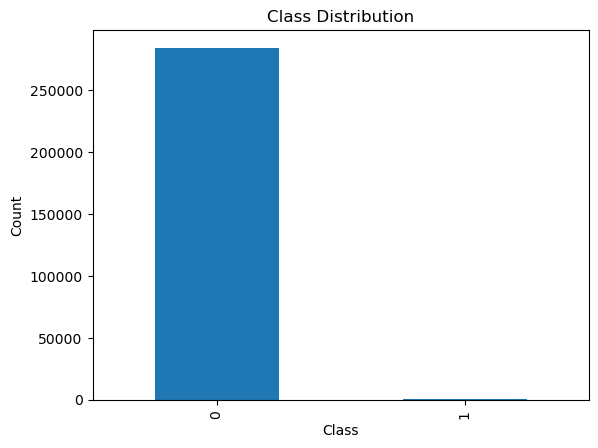

In [117]:
# Count of legitimate (0) vs. fraudulent (1) transactions
class_counts = data['Class'].value_counts()
print(class_counts)

# Visualize the class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [127]:
from sklearn.preprocessing import StandardScaler

# Check if 'Amount' column exists before scaling
if 'Amount' in data.columns:
    # Scale the 'Amount' column
    scaler = StandardScaler()
    data['Amount_Scaled'] = scaler.fit_transform(data[['Amount']])
    # Drop the original 'Amount' column
    data.drop(columns=['Amount'], inplace=True)
    print("Scaled 'Amount' column and replaced it with 'Amount_Scaled'.")
else:
    print("'Amount' column not found. Using existing 'Amount_Scaled' column if available.")

# Print the first few rows to verify changes
print(data.head())


'Amount' column not found. Using existing 'Amount_Scaled' column if available.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.0094

In [129]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")


Training size: 227845, Testing size: 56962


In [134]:
try:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model training successful!")
except Exception as e:
    print(f"Error in training: {e}")


Model training successful!


In [136]:
try:
    y_pred = model.predict(X_test)
    print("Predictions successful!")
    print("Sample predictions:", y_pred[:10])  # Print the first 10 predictions
except Exception as e:
    print(f"Error in prediction: {e}")


Predictions successful!
Sample predictions: [1 0 0 0 0 0 0 0 0 0]


In [138]:
try:
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"Error in evaluation: {e}")


Confusion Matrix:
[[56862     2]
 [   23    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [140]:
# Add predictions to the test set for storage
X_test['Predicted_Class'] = y_pred
X_test['Actual_Class'] = y_test.values  # Add actual labels for comparison

# Store predictions in the SQL database
from sqlalchemy import create_engine

# Define the connection
server = 'PANITA\\MSSQLSERVER01'  # Replace with your server
database = 'fraud_db'  # Replace with your database
engine = create_engine(f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server')

# Save predictions to a new table
X_test.to_sql('predictions', con=engine, if_exists='replace', index=False)

print("Predictions saved to the SQL database!")


Predictions saved to the SQL database!


In [142]:
import numpy as np

# Convert Time to days (floor division)
data['Transaction_Day'] = np.floor(data['Time'] / (24 * 60 * 60))

# Save updated data back to SQL
data.to_sql('transactions', con=engine, if_exists='replace', index=False)


42

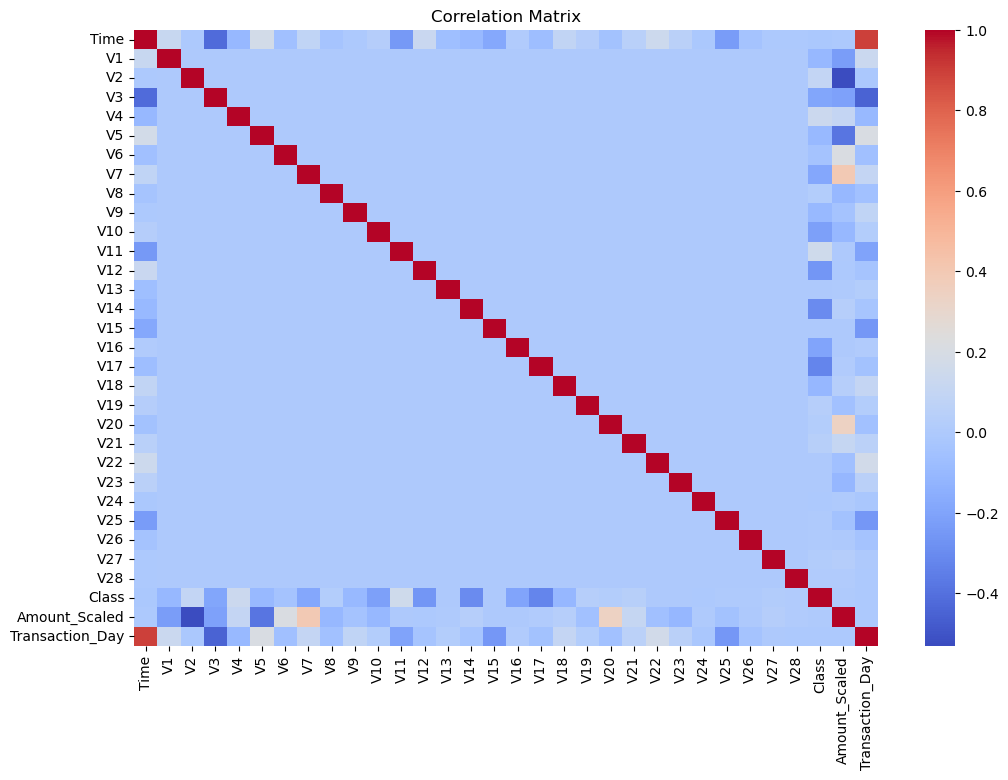

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


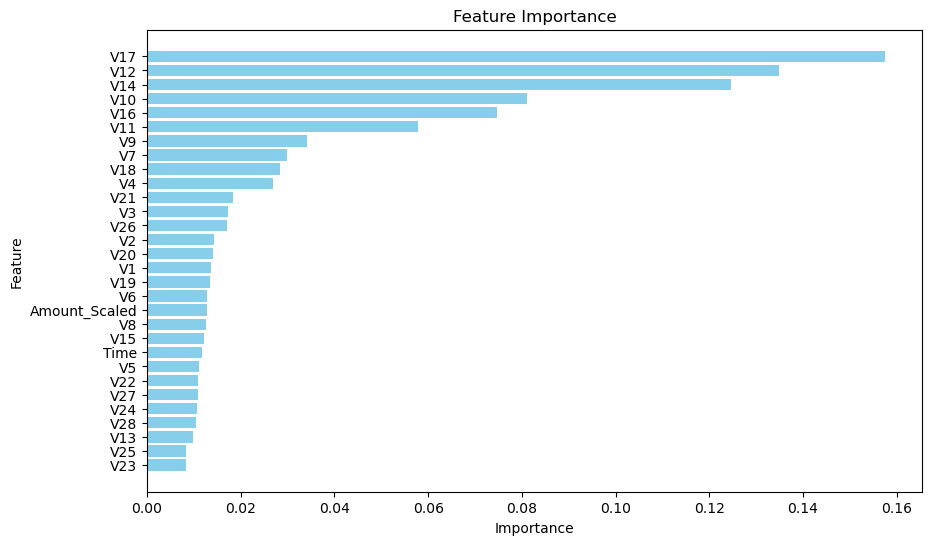

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [150]:
print(data['Amount_Scaled'].min(), data['Amount_Scaled'].max())


-0.35322939296682354 102.36224270928423
